# CIFAR100 - Categorical Classification
> # ResNet101

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [ ]:
import tensorflow

tensorflow.__version__

'2.9.2'

# I. CIFAR100 Data_Set Load

In [ ]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169001437/169001437 [==============================] - 4s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [ ]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((40000, 32, 32, 3), (40000, 100), (10000, 32, 32, 3), (10000, 100))

# III. Import ResNet101 Model

> ## 1) conv_base

In [ ]:
from tensorflow.keras.applications import ResNet101

conv_base = ResNet101(weights = 'imagenet',
                      include_top = False,
                      input_shape = (32, 32, 3))

171446536/171446536 [==============================] - 1s 0us/step


# IV. Keras Modeling

> ## 1) Model Define

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(100, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1, 1, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 100)               102500    
                                                                 
Total params: 44,858,852
Trainable params: 44,753,508
Non-trainable params: 105,344
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00005),
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 10분

In [ ]:
%%time

Hist_model = model.fit(X_train, y_train,
                       epochs = 15,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/15
313/313 [==============================] - 57s 121ms/step - loss: 4.6942 - accuracy: 0.0518 - val_loss: 258.9600 - val_accuracy: 0.0103
Epoch 2/15
313/313 [==============================] - 35s 113ms/step - loss: 3.6250 - accuracy: 0.1930 - val_loss: 24.0806 - val_accuracy: 0.0152
Epoch 3/15
313/313 [==============================] - 35s 110ms/step - loss: 2.8004 - accuracy: 0.3249 - val_loss: 3.8438 - val_accuracy: 0.2344
Epoch 4/15
313/313 [==============================] - 35s 111ms/step - loss: 2.2732 - accuracy: 0.4241 - val_loss: 2.4039 - val_accuracy: 0.4181
Epoch 5/15
313/313 [==============================] - 35s 111ms/step - loss: 1.8769 - accuracy: 0.5103 - val_loss: 2.2474 - val_accuracy: 0.4383
Epoch 6/15
313/313 [==============================] - 35s 112ms/step - loss: 1.5825 - accuracy: 0.5756 - val_loss: 2.3768 - val_accuracy: 0.4443
Epoch 7/15
313/313 [==============================] - 35s 111ms/step - loss: 1.2736 - accuracy: 0.6467 - val_loss: 2.2079 - val

> ## 4) 학습 결과 시각화

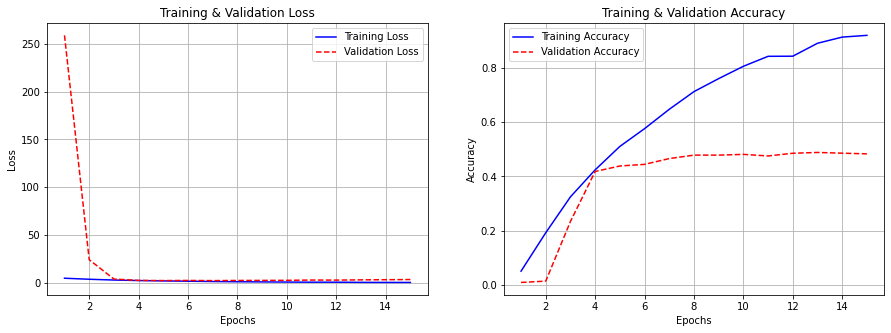

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.47810
Accuracy = 0.46940


# 
# 
# 
# The End
# 
# 
# 